<font size=6><b>Seminar 4 - IS-LM model</b></font><br/>
<font size=5>2022-11-24</b><br/>
<font size=3>Michal Kubišta<br/>
    <kubistmi@gmail.com></font>

In [ ]:
! pip install sympy==1.2

In [ ]:
import sympy as sp
import sympy.abc as sbc
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import FloatSlider

sp.init_printing()
sp.__version__

In [ ]:
def particular(eq, x_cond, y_cond, points = 150, tmin = -2, tmax = 2):
    """
    Find the particular solution of provided system of differential equations.

    This function firstly solves the initial conditions and the calculates the resulting function values
    for `points` number of points between the provided parameter interval (`tmin` and `tmax`).
    The initial conditions are used in the following form:
        x(0) = x_cond
        y(0) = y_cond

    Parameters
    ----------
    eq (list(sympy.Eq)):
        list of 2 sympy equations describing the system with the following expectations:
                       LHS      RHS
            - eq[0] -> x(t) = f(t, C1, C2)
            - eq[0] -> y(t) = f(t, C1, C2)

    x_cond (float):
        initial condition for x, in the form x(0) = x_cond

    y_cond (float):
        initial condition for y, in the form y(0) = y_cond

    points (int):
        number of points to be calculated

    tmin (float):
        minimum of the interval of parameter (`t`) values

    tmax (float):
        maximum of the interval of parameter (`t`) values

    Returns
    ----------
    tuple(x_p, y_p):
        x_p (numpy.ndarray):
            x-coordinates of the values of particular solution of size `points`

        y_p (numpy.ndarray):
            y-coordinates of the values of particular solution of size `points`
    """
    xt0 = eq[0].rhs.subs(t, 0)                                               # substitute t = 0 into both equations
    yt0 = eq[1].rhs.subs(t, 0)

    conds = sp.solve([sp.Eq(xt0, x_cond), sp.Eq(yt0, y_cond)])               # find the parameter values
    c1 = sp.Symbol('C1')
    c2 = sp.Symbol('C2')

    sol_p = [i.subs([(c1, conds[c1]), (c2, conds[c2])]) for i in eq]         # and substitute them back into equations

    t_vals = np.linspace(tmin, tmax, points)                                 # define t interval
    x_p = np.zeros(points)
    y_p = np.zeros(points)

    xfun = sp.lambdify(t, sol_p[0].rhs)
    yfun = sp.lambdify(t, sol_p[1].rhs)

    for i in range(points):                                                  # and calculate x, y values
        x_p[i] = xfun(t_vals[i])
        y_p[i] = yfun(t_vals[i])

    return(x_p, y_p)

In [ ]:
def vector_field(xfun, yfun, xvals, yvals):
    """
    Calculate the vector field for the system of differential equations.

    This function prepares a grid of [x,y] points from xvals and yvals and then
    calculates the value of the xfun and yfund for each of these points.
    It returns a tuple in a format suitable for `matplotlib.pyplot.quiver()`

    Parameters
    ----------
    xfun (function(x, y float) float):
        function describing the x-coordinate of the vector (arrow) at point [x,y]


    yfun (function(x,y float) float):
        function describing the y-coordinate of the vector (arrow) at point [x,y]

    xvals (np.ndarray):
        list of values that define the x-axis of the grid

    yvals (np.ndarray):
        list of values that define the y-axis of the grid

    Returns
    ----------
    tuple(xa_vals, ya_vals, dxa, dya):
        xa_vals (numpy.ndarray):
            array of x (x coordinates) for each point

        ya_vals (numpy.ndarray):
            array of y (y coordinates) for each point

        dxa (numpy.ndarray):
            array of x coordinate of the vectors (arrows)

        dya (numpy.ndarray):
            array of y coordinate of the vectors (arrows)

    """
    gridsize = len(xvals) * len(yvals)            # the grid [x,y]
    xa_vals = np.zeros(gridsize)                  # arrow positions x, y
    ya_vals = np.zeros(gridsize)
    dxa = np.zeros(gridsize)                      # arrow directions x, y
    dya = np.zeros(gridsize)

    p = 0
    for i in xvals:                               # for every x value
        for j in yvals:                           # for every y value
            xa_vals[p] = i                        # save the combination
            ya_vals[p] = j
            dxa[p] = xfun(i, j)                   # calculate both derivatives
            dya[p] = yfun(i, j)
            p += 1                                # increment the position

    return(xa_vals, ya_vals, dxa, dya)

In [ ]:
t = sp.symbols('t', real=True)

y = sp.Function('y')(t)
r = sp.Function('r')(t)
e = sp.Function('e')(t)
md = sp.Function('md')(t)

alpha = sbc.alpha
beta = sbc.beta

a = sp.symbols('a')
b = sp.symbols('b')
h = sp.symbols('h')
k = sp.symbols('k')
m0 = sp.symbols('m0')
T = sp.symbols('T')
u = sp.symbols('u')
c1 = sp.symbols('C1')
c2 = sp.symbols('C2')

In [ ]:
exp = sp.Eq(e, a + b*(1 - T)*y - h*r)
mdem = sp.Eq(md, k*y - u*r)

display(exp, mdem)

e(t) = a + b⋅(-T + 1)⋅y(t) - h⋅r(t)

md(t) = k⋅y(t) - u⋅r(t)

In [ ]:
adj_g = sp.Eq(y.diff(), alpha*(e - y))
adj_m = sp.Eq(r.diff(), beta*(md - m0))

display(adj_g, adj_m)

d                         
──(y(t)) = α⋅(e(t) - y(t))
dt                        

d                         
──(r(t)) = β⋅(-m₀ + md(t))
dt                        

In [ ]:
yt = adj_g.subs(e, exp.rhs)
rt = adj_m.subs(md, mdem.rhs)

display(yt, rt)

d                                                 
──(y(t)) = α⋅(a + b⋅(-T + 1)⋅y(t) - h⋅r(t) - y(t))
dt                                                

d                                  
──(r(t)) = β⋅(k⋅y(t) - m₀ - u⋅r(t))
dt                                 

In [ ]:
IS = sp.solve(yt.subs(y.diff(), 0), r)[0]
LM = sp.solve(rt.subs(r.diff(), 0), r)[0]

display(sp.Eq(r, IS), sp.Eq(r, LM))

       -T⋅b⋅y(t) + a + b⋅y(t) - y(t)
r(t) = ─────────────────────────────
                     h              

       k⋅y(t) - m₀
r(t) = ───────────
            u     

In [ ]:
IS_param = [(alpha, 3), (T, 0.3), (b, 0.6), (a, 5), (h, 1)]
LM_param = [(beta, 2), (k, 3), (m0, 3), (u, 2.5)]

In [ ]:
IS_s = IS.subs(IS_param)
LM_s = LM.subs(LM_param)

display(sp.Eq(r, IS_s), sp.Eq(r, LM_s))

r(t) = -0.58⋅y(t) + 5

r(t) = 1.2⋅y(t) - 1.2

In [ ]:
y_eq = sp.solve(sp.Eq(LM_s, IS_s), y)[0]
r_eq = IS_s.subs(y, y_eq)

display(sp.Eq(y,y_eq), sp.Eq(r, r_eq))

y(t) = 3.48314606741573

r(t) = 2.97977528089888

In [ ]:
lower = -10
upper = 20

y_vals = np.linspace(lower, upper)

rval_IS = [float(IS_s.subs(y, i)) for i in y_vals]
rval_LM = [float(LM_s.subs(y, i)) for i in y_vals]

In [ ]:
yt_s = yt.rhs.subs(IS_param)
rt_s = rt.rhs.subs(LM_param)

rspace = np.linspace(lower, upper, 15)
yspace = np.linspace(lower, upper, 15)

yfun = sp.lambdify((y, r), yt_s)
rfun = sp.lambdify((y, r), rt_s)

y_a, r_a, y_ad, r_ad = vector_field(yfun, rfun, yspace, rspace)

In [ ]:
eigen = sp.Matrix([
    sp.Poly(rt_s).coeffs()[:-1],
    sp.Poly(yt_s).coeffs()[:-1]
]).eigenvects()

eigen_vals = y_vals / sp.re(eigen[0][2][0][0].evalf()) + r_eq

eigen

⎡⎛                               ⎡⎡0.543333333333333 + 1.30567564459512⋅ⅈ⎤⎤⎞  
⎢⎜-3.37 - 3.91702693378537⋅ⅈ, 1, ⎢⎢                                      ⎥⎥⎟, 
⎣⎝                               ⎣⎣                 1.0                  ⎦⎦⎠  

⎛                               ⎡⎡0.543333333333333 - 1.30567564459512⋅ⅈ⎤⎤⎞⎤
⎜-3.37 + 3.91702693378537⋅ⅈ, 1, ⎢⎢                                      ⎥⎥⎟⎥
⎝                               ⎣⎣                 1.0                  ⎦⎦⎠⎦

In [ ]:
sol = sp.dsolve(
    [sp.Eq(y.diff(), yt_s), sp.Eq(r.diff(), rt_s)],
    [y, r]
)
sol

⎡                                                                       -3.37⋅
⎣y(t) = (-3⋅C₁⋅cos(3.91702693378537⋅t) - 3⋅C₂⋅sin(3.91702693378537⋅t))⋅ℯ      

t                                                                             
  + 3.48314606741573, r(t) = (C₁⋅(-3.91702693378537⋅sin(3.91702693378537⋅t) - 

                                                                              
1.63⋅cos(3.91702693378537⋅t)) + C₂⋅(-1.63⋅sin(3.91702693378537⋅t) + 3.91702693

                                  -3.37⋅t                   ⎤
378537⋅cos(3.91702693378537⋅t)))⋅ℯ        + 2.97977528089888⎦

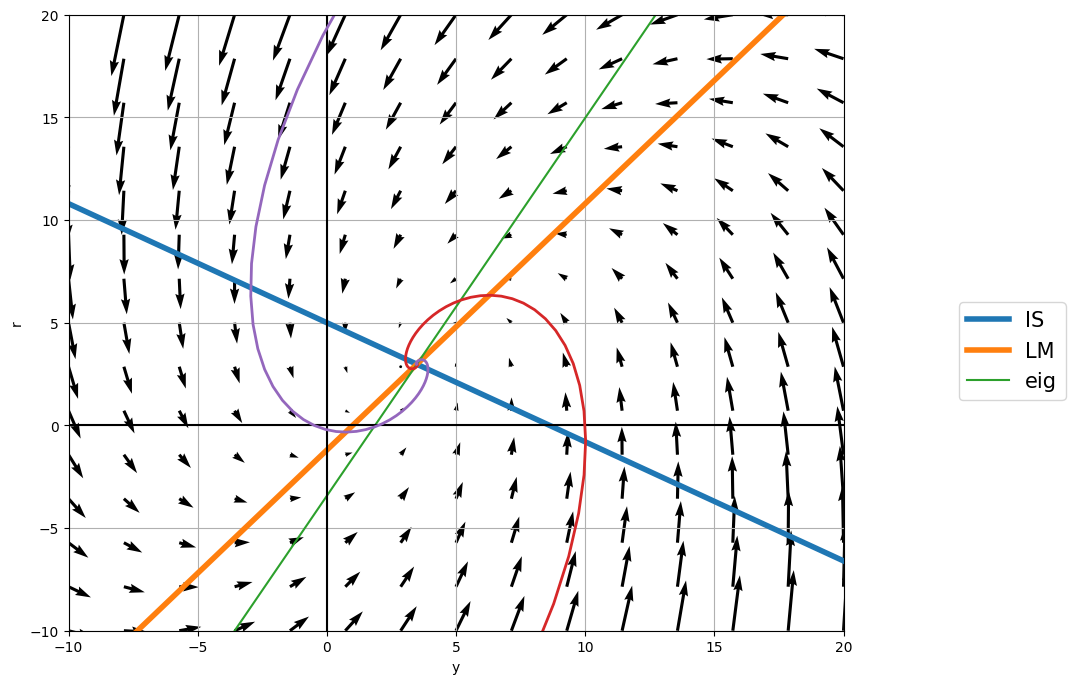

In [ ]:
fig = plt.figure(figsize = (10, 8))                                   # bigger plot

plt.xlabel('y')
plt.ylabel('r')
plt.xlim(lower, upper)
plt.ylim(lower, upper)
plt.grid()

plt.plot(y_vals, rval_IS, linewidth = 4, label = "IS")
plt.plot(y_vals, rval_LM, linewidth = 4, label = "LM")

plt.plot(y_vals + y_eq, eigen_vals, label = "eig")

plt.legend(bbox_to_anchor=(1.30, 0.55), prop={'size': 15})             # add legend, outside of the plot

plt.hlines(0, xmin = lower, xmax = upper, color = 'black')             # strengthen the x axis
plt.vlines(0, ymin = lower, ymax = upper, color = 'black')             # strengthen the y axis

plt.quiver(y_a, r_a, y_ad, r_ad)                                       # arrows

x0p, y0p = particular(sol, 10, 0)                                      # 2 particular solutions
plt.plot(x0p, y0p, linewidth = 2)

x1p, y1p = particular(sol, 2, 0)
plt.plot(x1p, y1p, linewidth = 2)

plt.show()

In [ ]:
ISfun = sp.lambdify((a, b, h, T, y), IS)
LMfun = sp.lambdify((k, m0, u, y), LM)

# define the update function
def update(a_v = 3, alpha_v = 0.50, b_v = 0.30, beta_v = 0.60, h_v = 0.3, k_v = 2, m0_v = 2, T_v = 0.1, u_v = 0.5):

    # LINE VALUES
    rval_y = [ISfun(a_v, b_v, h_v, T_v, i) for i in y_vals]
    rval_r = [LMfun(k_v, m0_v, u_v, i) for i in y_vals]

    # SUBSTITUTE & SOLVE particular solution
    y_s = yt.subs([(a, a_v), (alpha, alpha_v), (b, b_v), (h, h_v), (T, T_v)])
    r_s = rt.subs([(beta, beta_v), (k, k_v), (m0, m0_v), (u, u_v)])

    y_func = sp.Function('y')(t)
    r_func = sp.Function('r')(t)
    sol = sp.dsolve([y_s, r_s], [y_func, r_func])

    y_partic, r_partic = particular(sol, 10, 4, 5000, -50, 100)

    # PREPARE GRID & VECTORFIELD
    rspace = np.linspace(lower, upper, 15)
    yspace = np.linspace(lower, upper, 15)

    yfun = sp.lambdify((y, r), y_s.rhs)
    rfun = sp.lambdify((y, r), r_s.rhs)

    y_a, r_a, y_ad, r_ad = vector_field(yfun, rfun, yspace, rspace)

    # PLOT
    fig = plt.figure(figsize=(10, 8))

    plt.xlabel('y')
    plt.ylabel('r')
    plt.xlim(lower, upper)
    plt.ylim(lower, upper)
    plt.grid()

    plt.plot(y_vals, rval_y, linewidth = 4, label = "IS")
    plt.plot(y_vals, rval_r, linewidth = 4, label = "LM")
    plt.legend(bbox_to_anchor = (1.30, 0.55), prop = {'size': 15})

    plt.hlines(0, xmin = lower, xmax = upper, color = 'black')
    plt.vlines(0, ymin = lower, ymax = upper, color = 'black')

    plt.plot(y_partic, r_partic)
    plt.quiver(y_a, r_a, y_ad, r_ad, width = 0.002)
    plt.show()

In [ ]:
def fs(val, min, max, step):
    return FloatSlider(value=val, min=min, max=max, step=step, continuous_update = False)